In [203]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import plotly.express as px

In [204]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_European_countries_by_area"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

   Rank    State  ...                                              Notes Unnamed: 5
0   1.0  Russia*  ...  3,995,200 km2 (1,542,600 sq mi) including the ...        NaN
1   2.0  Ukraine  ...                                  Including Crimea.        NaN
2   3.0  France*  ...  643,801 km2 (248,573 sq mi) when the overseas ...        NaN
3   4.0   Spain*  ...  505,990 km2 (195,360 sq mi) when the Canary Is...        NaN
4   5.0   Sweden  ...                                                NaN        NaN

[5 rows x 6 columns]


In [205]:
Countries = df[['State']]
Countries['State'] = Countries['State'].str.replace('*','')
Countries.rename(columns={'State':'Country'}, inplace=True)
Countries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country
0,Russia
1,Ukraine
2,France
3,Spain
4,Sweden
5,Norway
6,Germany
7,Finland
8,Poland
9,Italy


In [206]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/Global_Social_Mobility_Index"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [207]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [208]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

   Rank  Country  Index Score
0     1  Denmark         85.2
1     2   Norway         83.6
2     3  Finland         83.6
3     4   Sweden         83.5
4     5  Iceland         82.7


In [209]:
# drop the unwanted columns
mobility = df.drop(["Rank"], axis=1)
# rename columns for ease

mobility

,Country,Index Score
0,Denmark,85.2
1,Norway,83.6
2,Finland,83.6
3,Sweden,83.5
4,Iceland,82.7
...,...,...
77,Bangladesh,40.2
78,Pakistan,36.7
79,Cameroon,36.0
80,Senegal,36.0


In [210]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_by_home_ownership_rate"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

# drop the unwanted columns
data = df.drop(["Date of Information"], axis=1)
# rename columns for ease
data = data.rename(columns={"Country or Territory": "Country"})
data

200
  Country or Territory Home ownership rate(%) Date of Information
0              Romania                   96.1             2019[2]
1              Hungary                   91.3             2020[2]
2             Slovakia                   90.9             2019[2]
3            Lithuania                   90.3             2019[2]
4                 Cuba                     90             2014[3]


,Country,Home ownership rate(%)
0,Romania,96.1
1,Hungary,91.3
2,Slovakia,90.9
3,Lithuania,90.3
4,Cuba,90
...,...,...
66,Switzerland,41.6
67,United Arab Emirates,28
68,Nigeria,25
69,Fiji,10


In [211]:

merge = pd.merge(Countries, data, on='Country', how='left')
merged = pd.merge(merge, mobility, on='Country', how='left')
merged

,Country,Home ownership rate(%),Index Score
0,Russia,89,64.7
1,Ukraine,NaN,61.2
2,France,64.1,76.7
3,Spain,76.2,70.0
4,Sweden,64.5,83.5
5,Norway,80.3,83.6
6,Germany,51.1,78.8
7,Finland,70.7,83.6
8,Poland,84.2,69.1
9,Italy,72.4,67.4


In [212]:
merged['Index Score'] = merged['Index Score'].astype(float)
merged['Home ownership rate(%)'] = merged['Home ownership rate(%)'].astype(float)

merged = merged.dropna()

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

0.23935808005860504


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



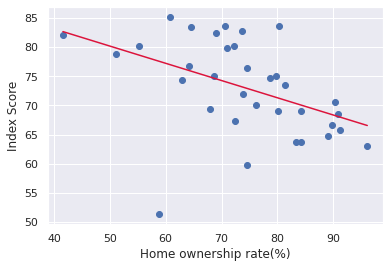

In [214]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

from sklearn.pipeline import make_pipeline

x = merged.dropna()['Home ownership rate(%)']
y = merged.dropna()['Index Score']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Home ownership rate(%)')
plt.ylabel('Index Score')

poly_model = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, poly_model(x)))

In [215]:
plt.savefig('Social Mobility.png')
plt.savefig('Social Mobility.pdf')

<Figure size 432x288 with 0 Axes>

In [216]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



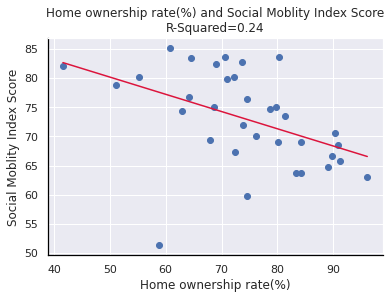

In [221]:
x = merged.dropna()['Home ownership rate(%)']
y = merged.dropna()['Index Score']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
ax = plt.gca()


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.title("Home ownership rate(%) and Social Moblity Index Score\nR-Squared=0.24")

plt.xlabel('Home ownership rate(%)')
plt.ylabel('Social Moblity Index Score')

plt.savefig('Social Moblity.png')

plt.savefig('Social Moblity.pdf')

In [218]:
plt.savefig('Social Moblity.png')

plt.savefig('Social Moblity.pdf')

<Figure size 432x288 with 0 Axes>

In [219]:
poly_model = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, poly_model(x)))

0.23935808005860504
